<a href="https://colab.research.google.com/github/Salma11557/My-Codes/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [535]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [536]:
import pandas as pd


In [537]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')


In [538]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [539]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [540]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [542]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)


Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [543]:
#df.shape

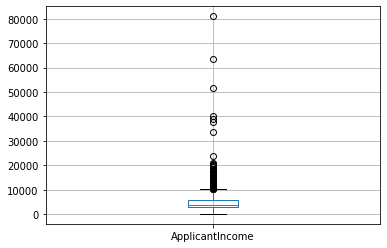

In [544]:
#To check the outliers
df.boxplot(column='ApplicantIncome')

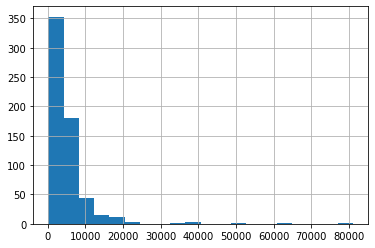

In [545]:
df['ApplicantIncome'].hist(bins=20)

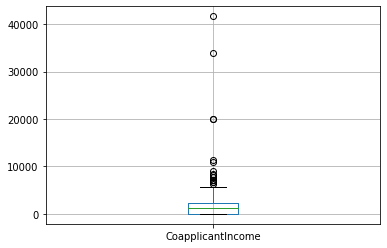

In [546]:
#To check the outliers
df.boxplot(column='CoapplicantIncome')

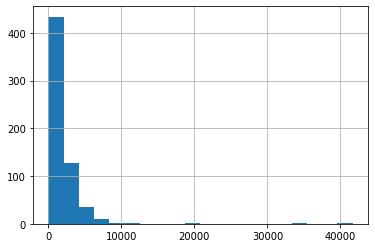

In [547]:
df['CoapplicantIncome'].hist(bins=20)

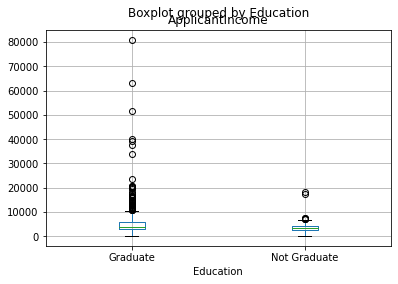

In [548]:
#To understand the realtionship between applicant income and education
df.boxplot(column='ApplicantIncome', by= 'Education')

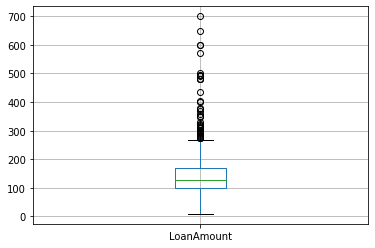

In [549]:
df.boxplot(column='LoanAmount')

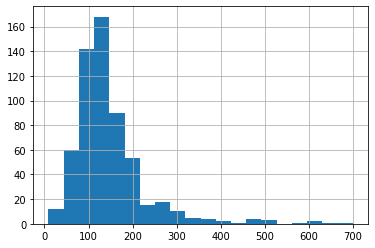

In [550]:
df['LoanAmount'].hist(bins=20)

In [551]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

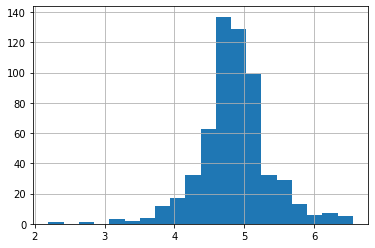

In [552]:
df['LoanAmount_log'].hist(bins=20)

#Verifying whether data has any null values(Data Pre processing)

In [553]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

#Since loan and credit history have null values,I am filling them using mean and median values

In [554]:
#filling the categorical term null values

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [555]:
#filling the numerical null values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_log']=df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())


In [556]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [557]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

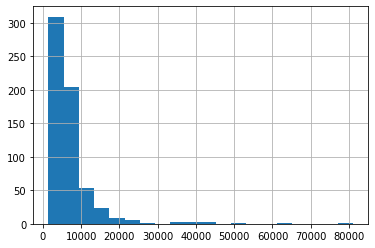

In [558]:
df['TotalIncome'].hist(bins=20)

In [559]:
df['TotalIncome_log']=np.log(df['TotalIncome'])

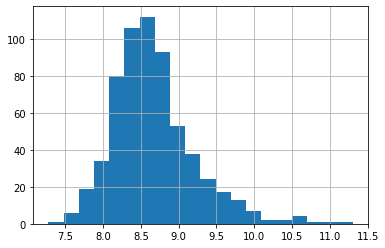

In [560]:
df['TotalIncome_log'].hist(bins=20)

In [561]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [562]:
df.shape

(614, 16)

In [563]:
#converting the categorical values to numerical values
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df['Married'].replace('Yes',1,inplace=True)
df['Married'].replace('No',0,inplace=True)

#df['Dependents'].replace('0',0,inplace=True)
#df['Dependents'].replace('1',1,inplace=True)
#df['Dependents'].replace('2',2,inplace=True)
#df['Dependents'].replace('3',3,inplace=True)
df['Dependents'].replace('3+',3,inplace=True)
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',0,inplace=True)

df['Self_Employed'].replace('Yes',1,inplace=True)
df['Self_Employed'].replace('No',0,inplace=True)
df['Property_Area'].replace('Urban',2,inplace=True)
df['Property_Area'].replace('Rural',0,inplace=True)
df['Property_Area'].replace('Semiurban',1,inplace=True)


In [564]:
print(df['Loan_Status'].value_counts())
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['LoanAmount'].value_counts())
print(df['Loan_Amount_Term'].value_counts())
print(df['Credit_History'].value_counts())
print(df['LoanAmount_log'].value_counts())
print(df['TotalIncome'].value_counts())
print(df['TotalIncome_log'].value_counts())




1    422
0    192
Name: Loan_Status, dtype: int64
1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
1    480
0    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    525
0.0     89
Name: Credit_History, dtype: int64
4.857444    22
4.787492    20
4.700480    17
4.605170    15
5.075174    12
            ..
5.480639     1
5.365976     1
4.077537     1
5.111988     1
5.533389     

In [565]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [566]:
#checking the categorical dependant variable correlation with other variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
Gender,1.00,0.36,-0.05,-0.00,0.06,0.08,0.11,-0.07,0.01,-0.03,0.02,0.14,0.09,0.17
Married,0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09,0.18,0.08,0.15
Education,-0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.08,0.07,0.07,0.09,0.15,0.16,0.20
Self_Employed,-0.00,0.00,0.01,1.00,0.13,-0.02,0.12,-0.03,-0.00,-0.03,-0.00,0.11,0.11,0.18
ApplicantIncome,0.06,0.05,0.14,0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00,0.44,0.89,0.72
CoapplicantIncome,0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.21,0.34,0.38
LoanAmount,0.11,0.15,0.17,0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,-0.04,0.90,0.62,0.69
Loan_Amount_Term,-0.07,-0.10,0.08,-0.03,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02,0.09,-0.07,-0.06
Credit_History,0.01,0.01,0.07,-0.00,-0.02,0.01,-0.00,0.00,1.00,0.00,0.54,-0.02,-0.01,0.02
Property_Area,-0.03,0.00,0.07,-0.03,-0.01,0.01,-0.04,-0.08,0.00,1.00,0.03,-0.10,-0.00,-0.05


In [ ]:
#from this correlation matrix,Credit_History has the highest correlation with Loan_Status

In [567]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [568]:
Y = df['Loan_Status']
X = df.drop(['Loan_ID','Loan_Status'], axis = 1)

In [569]:
#X=df.iloc[1:614,1:16].values
#Y=df.iloc[1:614,12:13].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.size,X_test.size,Y_train.size,Y_test.size)

6874 1722 491 123


In [570]:
model=LogisticRegression()
model_fit=model.fit(X_train,Y_train)
pred=model.predict(X_test)

In [571]:
print(pred)
print(Y_test)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64


In [572]:
from sklearn.metrics import accuracy_score


In [573]:
log_result= accuracy_score(pred,Y_test)
print(log_result)

0.8373983739837398


In [574]:
# creating the dataset
data = {'Logistic Regression':round(log_result,2)}
Algorithm = list(data.keys())
values = list(data.values())
print(data)

{'Logistic Regression': 0.84}


In [575]:
# Visualize the Models
#plt.figure(figsize=(24, 8))

#plt.subplot(1, 2, 1)
#plt.bar(Algorithm, values, color ='maroon',width = 0.2) 
#plt.xlabel("Type of Algo")
#plt.ylabel("Accuracy")
#plt.title("Comparison between algo")


#plt.show()

#decision tree regression

In [576]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [577]:
df.groupby('Loan_Status').mean()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
Loan_Status,,,,,,,,,,,,,
0,0.807292,0.588542,0.729167,0.135417,5446.078125,1877.807292,150.945488,344.000000,0.572917,1.000000,4.885478,7323.885417,8.663567
1,0.822275,0.682464,0.805687,0.132701,5384.068720,1504.516398,144.349606,341.090047,0.983412,1.054502,4.844689,6888.585118,8.672073


In [579]:
y=df['Loan_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [580]:
y.shape

(614,)

In [581]:
x=df[1:]

In [582]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)

print(x,x.shape)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [583]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.size,x_test.size,y_train.size,y_test.size)

6874 1722 491 123


In [584]:
from sklearn.tree import DecisionTreeClassifier

In [585]:
dt1=DecisionTreeClassifier(max_depth=3,random_state=0)

In [586]:
model1=dt1.fit(x_train,y_train)
pred1=dt1.predict(x_test)

In [587]:
print(pred1)
print(y_test)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64


In [588]:
dt1_result=accuracy_score(pred1,y_test)
print(dt1_result)

0.8211382113821138


In [589]:
# creating the dataset
data1 = {'Decision Tree with depth 3':round(dt1_result,2)}
Algorithm = list(data1.keys())
values = list(data1.values())
print(data1)

{'Decision Tree with depth 3': 0.82}


In [590]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4583333333333333, 0.875, 'X[9] <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]'),
 Text(0.25, 0.625, 'X[11] <= 6.301\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(0.16666666666666666, 0.375, 'X[7] <= 159.0\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.25, 0.125, 'gini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'X[13] <= 7.778\ngini = 0.341\nsamples = 418\nvalue = [91, 327]'),
 Text(0.5, 0.375, 'X[0] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.375, 'X[7] <= 145.706\ngini = 0.327\nsamples = 408\nvalue = [84, 324]'),
 Text(0.75, 0.125, 'gini = 0.255\nsamples = 247\nvalue = [37, 2

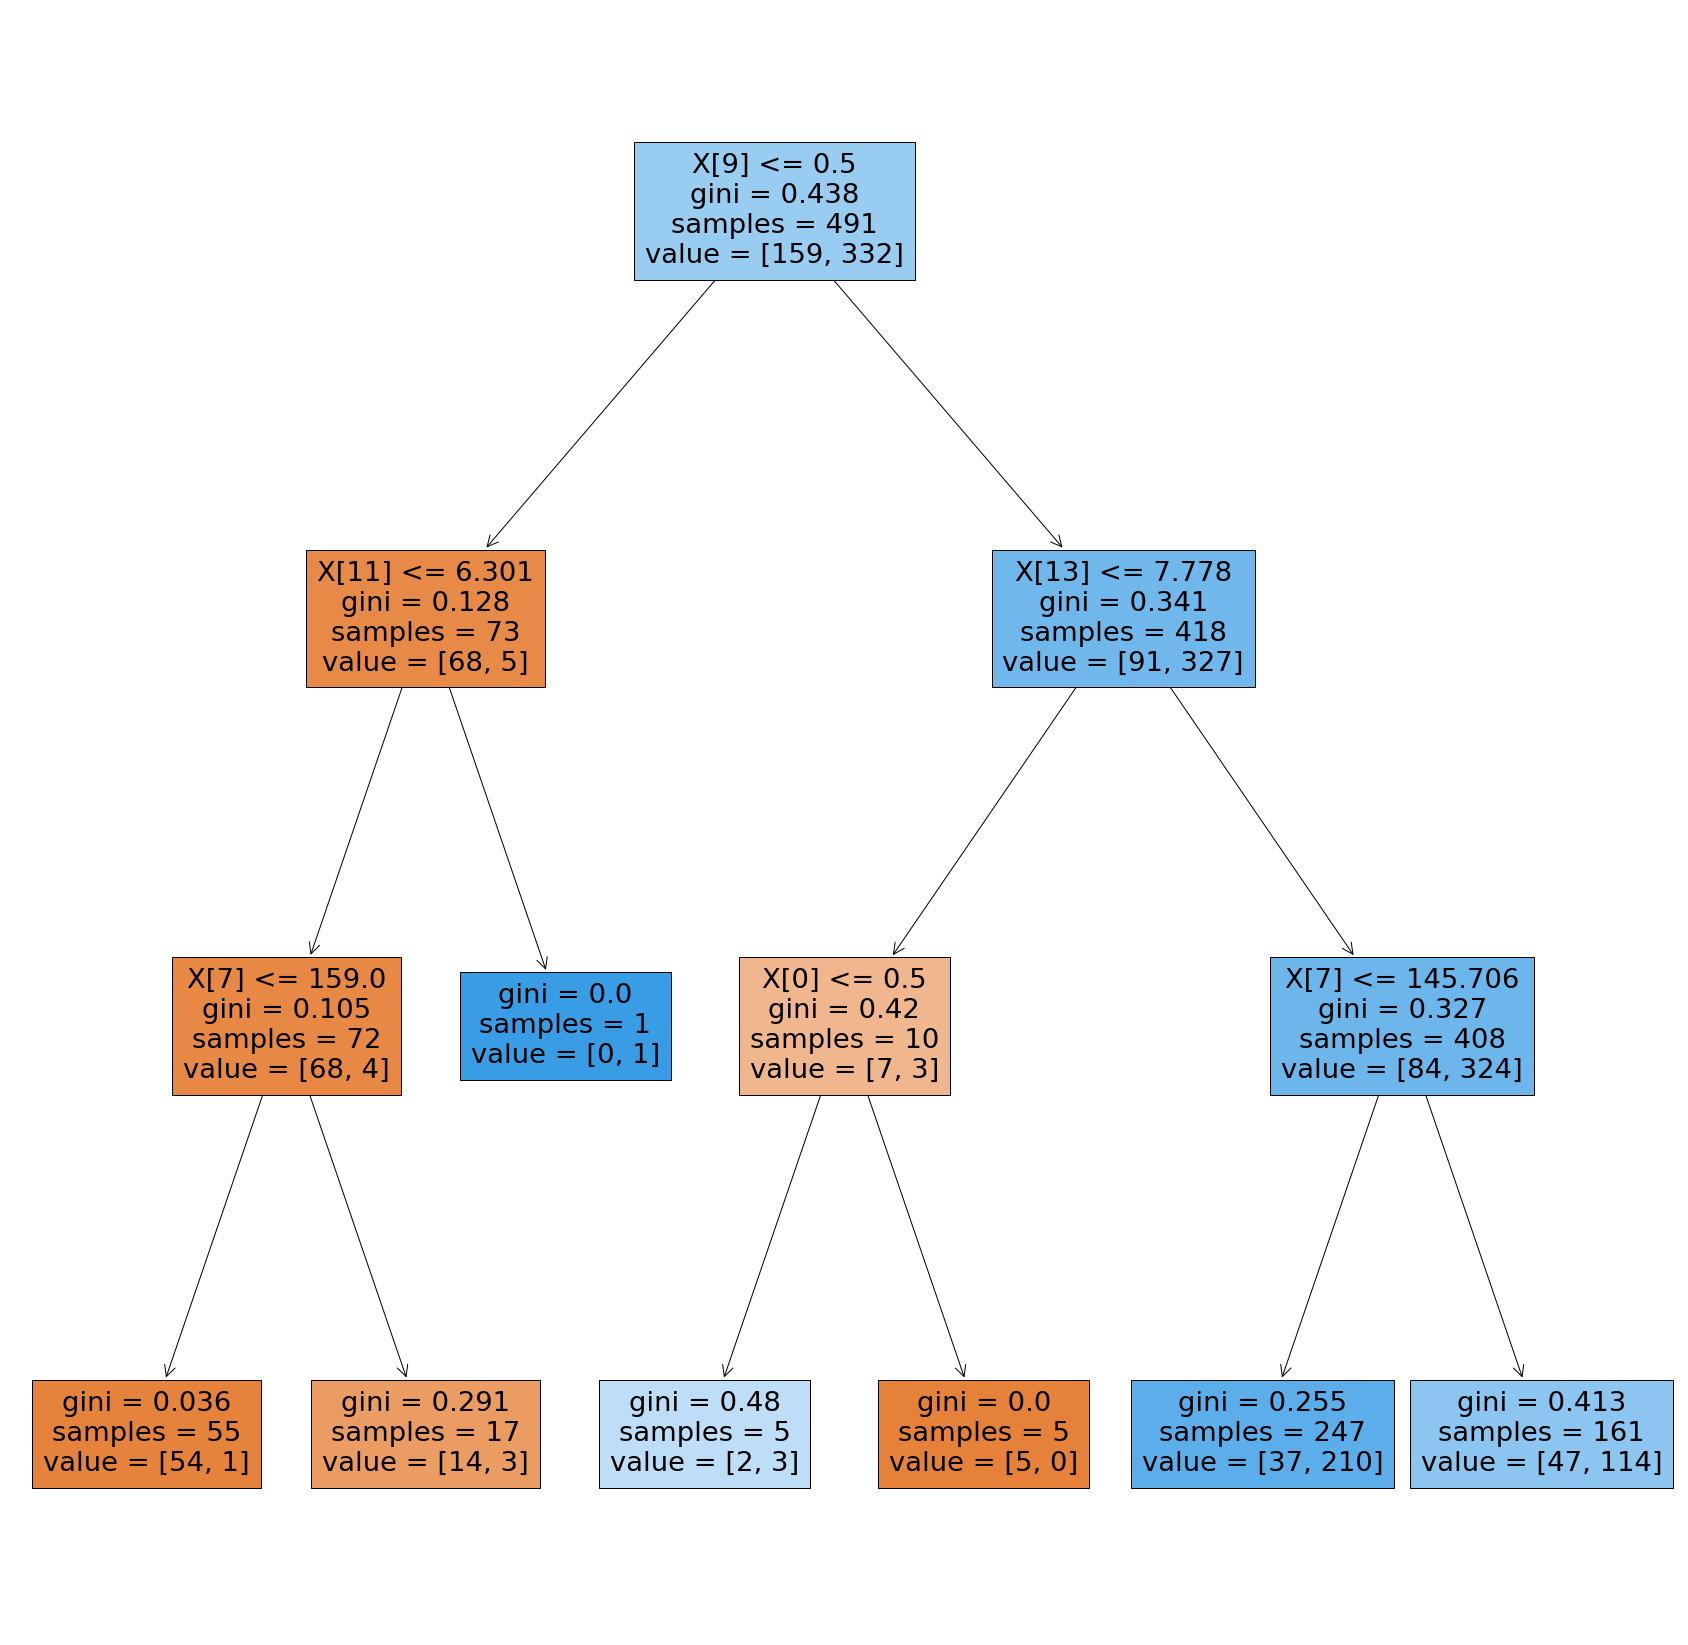

In [591]:
plt.figure(figsize=(30,30))
plot_tree(dt1,filled=True)

In [592]:
dt2=DecisionTreeClassifier(max_depth=5,random_state=0)
model2=dt2.fit(x_train,y_train)
pred2=dt2.predict(x_test)
print(pred2)
print(y_test)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 1]
454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64


In [593]:
dt2_result=accuracy_score(pred2,y_test)
print(dt2_result)

0.8211382113821138


[Text(0.39655172413793105, 0.9166666666666666, 'X[9] <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]'),
 Text(0.20689655172413793, 0.75, 'X[11] <= 6.301\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(0.1724137931034483, 0.5833333333333334, 'X[7] <= 159.0\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(0.06896551724137931, 0.4166666666666667, 'X[5] <= 4836.0\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.034482758620689655, 0.25, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.10344827586206896, 0.25, 'X[5] <= 4931.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.06896551724137931, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13793103448275862, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.27586206896551724, 0.4166666666666667, 'X[11] <= 5.152\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.2413793103448276, 0.25, 'X[10] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(

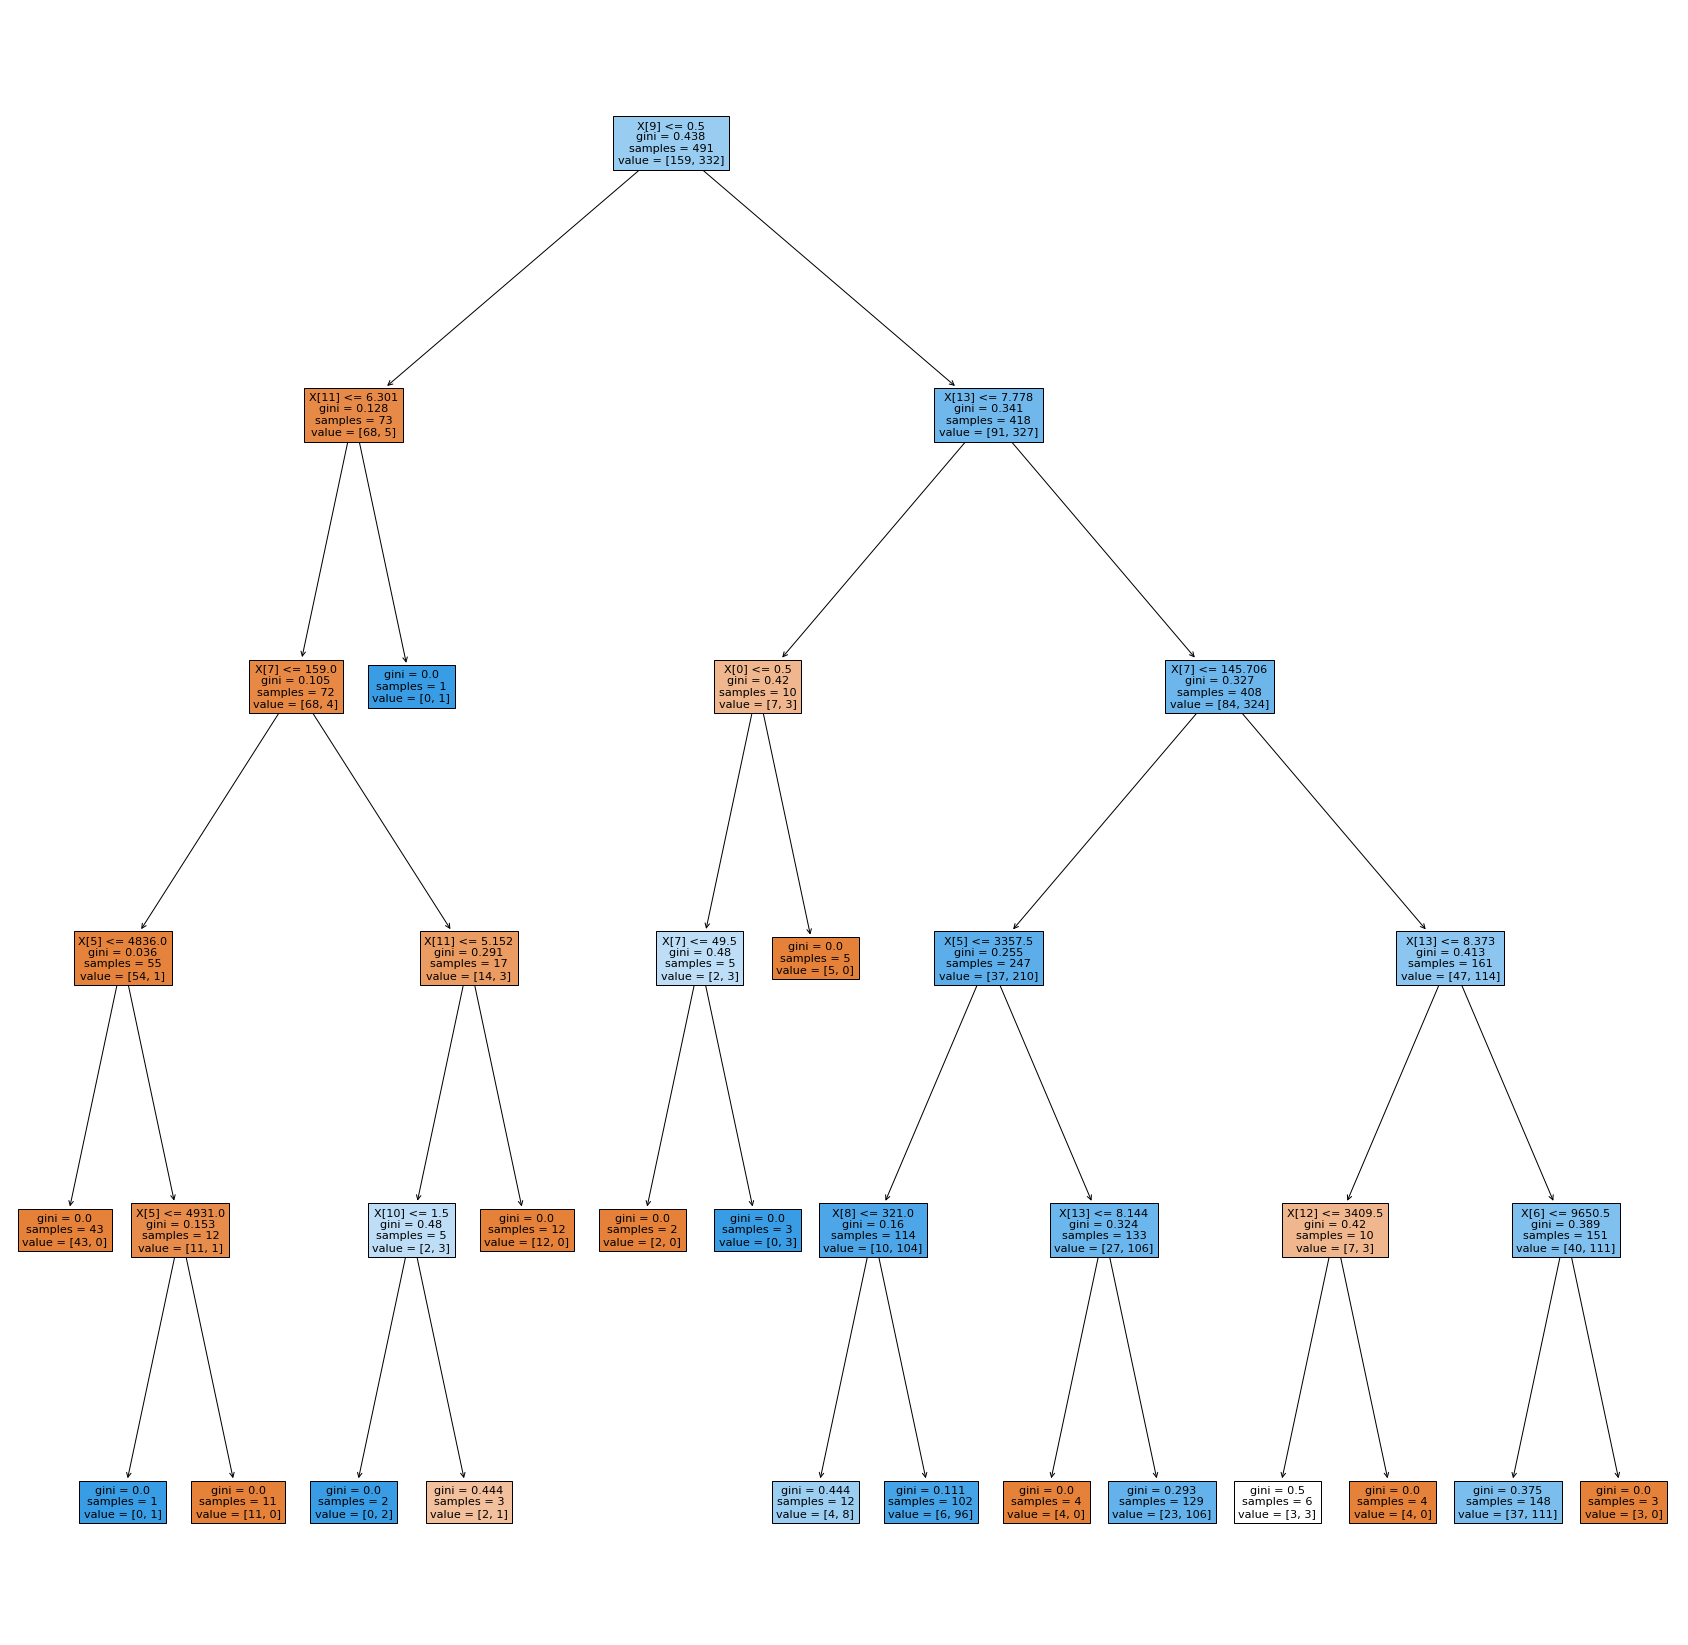

In [594]:
plt.figure(figsize=(30,30))
plot_tree(dt2,filled=True)

In [595]:
dt3=DecisionTreeClassifier(max_depth=7,random_state=0)

In [596]:
model3=dt3.fit(x_train,y_train)
pred3=dt3.predict(x_test)

In [597]:
print(pred3)
print(y_test)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 1]
454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64


In [598]:
dt3_result=accuracy_score(pred3,y_test)
print(dt3_result)

0.7967479674796748


[Text(0.31551204819277107, 0.9375, 'X[9] <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]'),
 Text(0.14457831325301204, 0.8125, 'X[11] <= 6.301\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(0.12048192771084337, 0.6875, 'X[7] <= 159.0\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(0.04819277108433735, 0.5625, 'X[5] <= 4836.0\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.024096385542168676, 0.4375, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.07228915662650602, 0.4375, 'X[5] <= 4931.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.04819277108433735, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0963855421686747, 0.3125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.1927710843373494, 0.5625, 'X[11] <= 5.152\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.1686746987951807, 0.4375, 'X[10] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.14457831325301204, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 

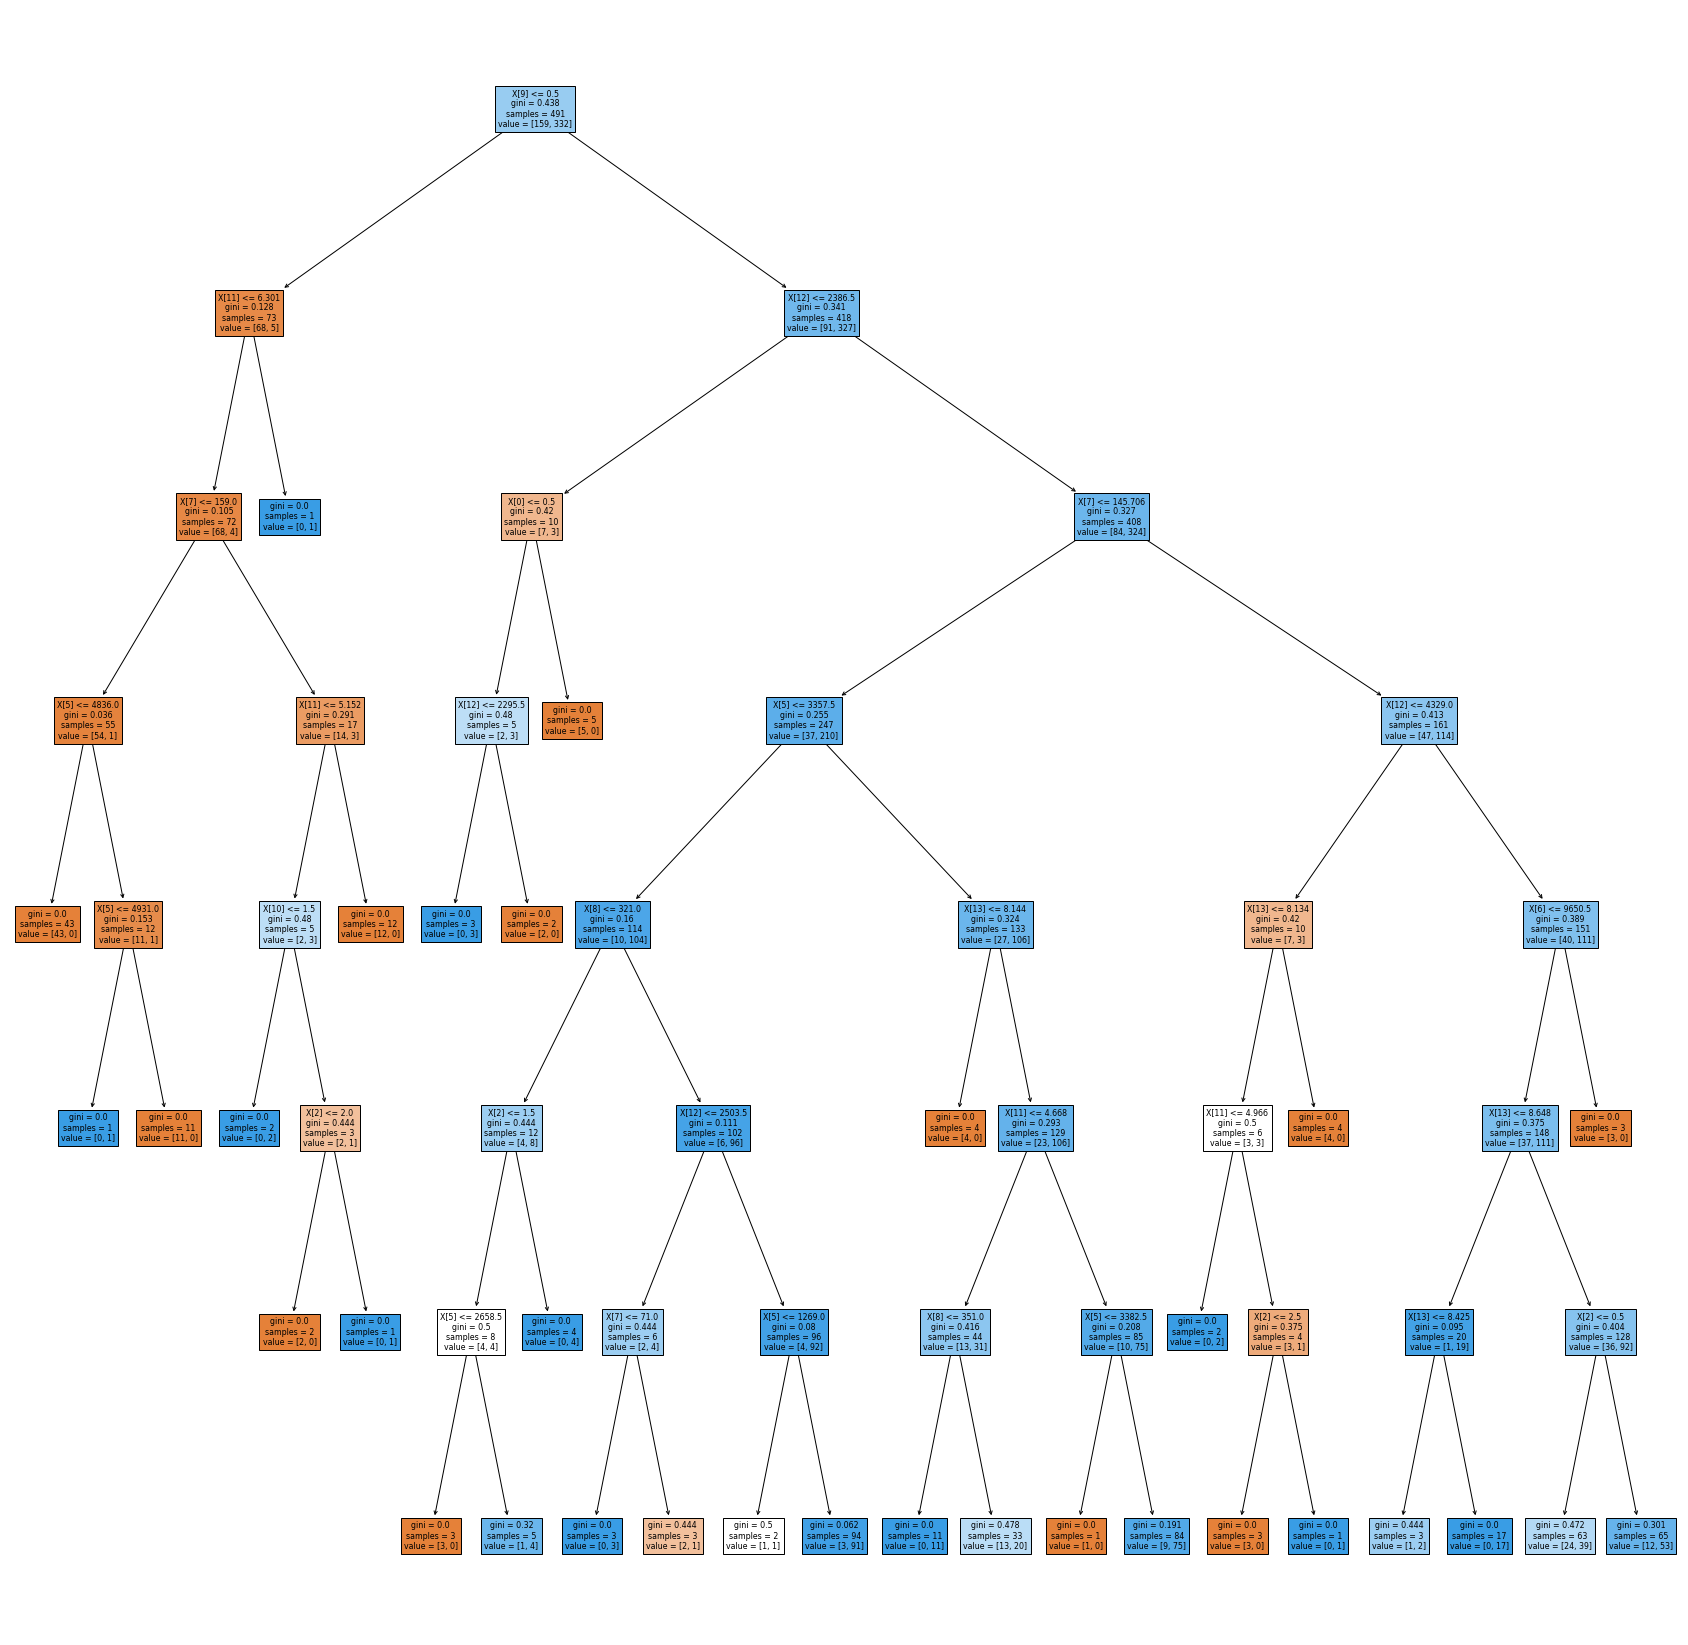

In [599]:
plt.figure(figsize=(30,30))
plot_tree(dt3,filled=True)

In [600]:
dt4=DecisionTreeClassifier(max_depth=None,random_state=0)
model4=dt4.fit(x_train,y_train)
pred4=dt4.predict(x_test)
print(pred4)
print(y_test)

[1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 1 0 0 1]
454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64


In [601]:
dt4_result=accuracy_score(pred4,y_test)
print(dt4_result)

0.6910569105691057


In [602]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df_whole = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
  model_new = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=input_parameter, min_samples_split=2,min_samples_leaf=1, min_weight_fraction_leaf=0.0,max_features=None, random_state=21, 
                   max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None)
  model_new1=model_new.fit(x_train,y_train)
  pred_new=model_new1.predict(x_test)
  acc_score = accuracy_score(y_test,pred_new)*100
  df_new = df_whole.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)  
  if acc_score > c_best_accuracy:
    c_best_accuracy = acc_score
    c_best_parameter = input_parameter
    c_best_model = model
        
  if acc_score < c_worst_accuracy:
    c_worst_accuracy = acc_score
    c_worst_parameter = input_parameter
    c_worst_model = model  

  print(df_new)
  print("")  




   max_depth   accuracy
0        1.0  82.926829

   max_depth   accuracy
0        2.0  82.113821

   max_depth   accuracy
0        3.0  82.113821

   max_depth   accuracy
0        4.0  82.113821

   max_depth   accuracy
0        5.0  82.113821

   max_depth   accuracy
0        6.0  82.113821

   max_depth   accuracy
0        7.0  79.674797

   max_depth   accuracy
0        8.0  79.674797

   max_depth   accuracy
0        9.0  68.292683

   max_depth   accuracy
0       10.0  74.796748

   max_depth   accuracy
0       11.0  71.544715

   max_depth   accuracy
0       12.0  71.544715

   max_depth   accuracy
0       13.0  71.544715

   max_depth   accuracy
0       14.0  68.292683

   max_depth   accuracy
0       15.0  68.292683



In [603]:
# creating the dataset
data_whole = {'Logistic Regression':round(log_result,2),
        'DTC-depth 3':round(dt1_result,2),
        'DTC-depth None':round(dt4_result,2)}
Algorithm = list(data_whole.keys())
values = list(data_whole.values())
print(data_whole)

{'Logistic Regression': 0.84, 'DTC-depth 3': 0.82, 'DTC-depth None': 0.69}


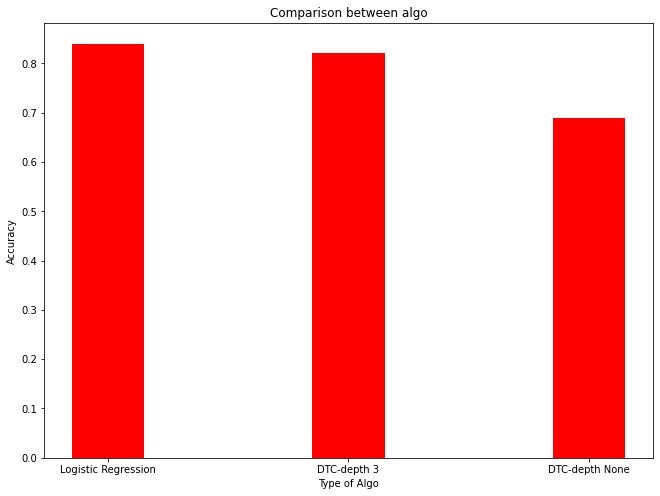

In [604]:
# Visualize the Models
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.bar(Algorithm, values, color ='red',width = 0.3) 
plt.xlabel("Type of Algo")
plt.ylabel("Accuracy")
plt.title("Comparison between algo")


plt.show()